Load data and import libraries

In [54]:
import pandas as pd
from helpers.data_preprocessing import DataProcesser

data = pd.read_csv("./../../data/train_set_0520.csv", usecols=['comment', 'non-information'])

comments = data['comment'].apply(str)

### Preprocess data:
1. remove java tags
2. remove all special characters and accents
3. turn all characters into lower case
4. stemming --> put the word into its most basic form

In [55]:
dp = DataProcesser()

comments = dp.preprocess(comments)
comments = pd.Series(comments)

comments.head()



0                                   implnot taken from
1             iconsettooltiptextprintedviewmodelgetloc
2    synchron chang of the underli date valu with t...
3    ask if the user realli want to close the given...
4                                           css inform
dtype: object

Split words and put them into a list

In [56]:
split_comments = " ".join(comments)
split_comments = split_comments.split()
split_comments[0:15]

['implnot',
 'taken',
 'from',
 'iconsettooltiptextprintedviewmodelgetloc',
 'synchron',
 'chang',
 'of',
 'the',
 'underli',
 'date',
 'valu',
 'with',
 'the',
 'temporalaccessorvalu',
 'ask']

count word frequency

In [57]:
from collections import Counter
counted_comments = Counter(split_comments)
{k: counted_comments[k] for k in list(counted_comments)[:15]}

{'implnot': 1,
 'taken': 9,
 'from': 105,
 'iconsettooltiptextprintedviewmodelgetloc': 1,
 'synchron': 1,
 'chang': 99,
 'of': 318,
 'the': 1407,
 'underli': 3,
 'date': 13,
 'valu': 60,
 'with': 102,
 'temporalaccessorvalu': 1,
 'ask': 11,
 'if': 256}

15 most common words

In [58]:
most_occur = counted_comments.most_common(15)
most_occur


[('the', 1407),
 ('to', 572),
 ('a', 444),
 ('is', 344),
 ('of', 318),
 ('thi', 307),
 ('in', 270),
 ('and', 264),
 ('if', 256),
 ('for', 253),
 ('entri', 215),
 ('it', 204),
 ('file', 188),
 ('be', 179),
 ('that', 153)]

most common words after removing stopwords

In [1]:
from helpers.textual_analysis import *

counted_comments = get_most_common_words(comments)
most_occur = counted_comments.most_common(15)
most_occur

NameError: name 'get_most_common_words' is not defined

Word Cloud

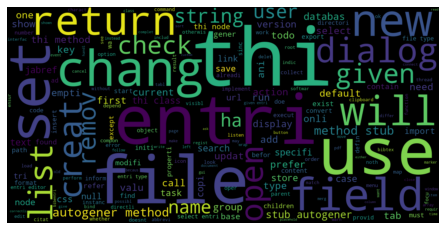

In [60]:
create_word_cloud(comments)

Non-information 'yes' comments

In [61]:
bad_comments = data[data['non-information'] == 'yes']
bad_comments = bad_comments['comment'].apply(str)

dp = DataProcesser()

bad_comments = dp.preprocess(bad_comments)
bad_comments = pd.Series(bad_comments)

bad_comments[:15]

0                                    implnot taken from
1              iconsettooltiptextprintedviewmodelgetloc
2     ask if the user realli want to close the given...
3                                       each entri type
4               final add thing to the current open tab
5                                         db file exist
6                       dir must be a folder not a file
7                                                  save
8                                 clear the current log
9                                      revert the chang
10      get the search describ for a given search queri
11              return the hashmap contain all key bind
12                add the given entri to thi node group
13                                              default
14                                      bug report bodi
dtype: object

What words are most common among the non-information 'yes' comments?

In [62]:
counted_comments = get_most_common_words(bad_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 154),
 ('method', 57),
 ('autogener', 54),
 ('stub', 54),
 ('to', 44),
 ('a', 43),
 ('if', 38),
 ('entri', 33),
 ('for', 33),
 ('of', 29),
 ('given', 23),
 ('return', 23),
 ('and', 23),
 ('file', 22),
 ('css', 21)]

Word Cloud of non-information 'yes' comments

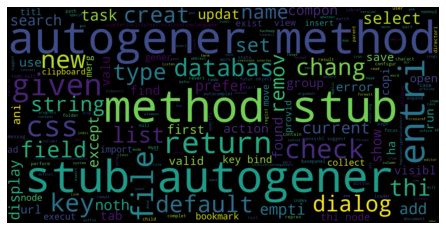

In [63]:
# Generate a word cloud image
create_word_cloud(bad_comments)

Non-information 'no' comments

In [64]:
data.head()
good_comments = data[data['non-information'] == 'no']
good_comments = good_comments['comment'].apply(str)

#clean data
dp = DataProcesser()

good_comments = dp.preprocess(good_comments)
good_comments = pd.Series(good_comments)

good_comments.head()

0    synchron chang of the underli date valu with t...
1                                           css inform
2    check if there is a default type with the same...
3    todo usernam domain and ident should be includ...
4    alreadi pars via command line paramet eg jabre...
dtype: object

What words are most common among the non-information 'no' comments?

In [65]:
counted_comments = get_most_common_words(good_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 1253),
 ('to', 528),
 ('a', 401),
 ('is', 329),
 ('of', 289),
 ('thi', 289),
 ('in', 258),
 ('and', 241),
 ('for', 220),
 ('if', 218),
 ('it', 190),
 ('entri', 182),
 ('be', 170),
 ('file', 166),
 ('that', 143)]

Non-information 'no' comments

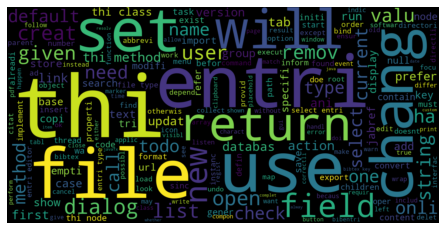

In [66]:
# Generate a word cloud image
create_word_cloud(good_comments)


Remove stopwords from comments

In [67]:
dp = DataProcesser()
comments = comments.apply(lambda x: dp.remove_stopwords(x))
comments.head()

0                                        implnot taken
1             iconsettooltiptextprintedviewmodelgetloc
2    synchron chang underli date valu temporalacces...
3             ask user realli want close given databas
4                                           css inform
dtype: object

Most frequent words, removed stopwords

In [68]:
counted_comments = get_most_common_words(comments)
most_occur = counted_comments.most_common(15)
most_occur

[('thi', 307),
 ('entri', 215),
 ('file', 188),
 ('method', 145),
 ('use', 133),
 ('set', 102),
 ('new', 102),
 ('chang', 99),
 ('return', 95),
 ('type', 93),
 ('field', 91),
 ('dialog', 86),
 ('given', 85),
 ('creat', 76),
 ('list', 70)]

Most frequent words- non-information 'yes', removed stopwords

In [69]:
bad_comments = bad_comments.apply(lambda x: dp.remove_stopwords(x))
counted_comments = get_most_common_words(bad_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('method', 57),
 ('autogener', 54),
 ('stub', 54),
 ('entri', 33),
 ('given', 23),
 ('return', 23),
 ('file', 22),
 ('css', 21),
 ('key', 20),
 ('thi', 18),
 ('check', 17),
 ('new', 15),
 ('databas', 14),
 ('chang', 13),
 ('default', 13)]

Most frequent words- non-information 'no', removed stopwords

In [70]:
good_comments = good_comments.map(lambda x: dp.remove_stopwords(x))
counted_comments = get_most_common_words(good_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('thi', 289),
 ('entri', 182),
 ('file', 166),
 ('use', 127),
 ('set', 91),
 ('method', 88),
 ('new', 87),
 ('chang', 86),
 ('type', 81),
 ('field', 79),
 ('dialog', 74),
 ('return', 72),
 ('creat', 64),
 ('class', 63),
 ('given', 62)]